# Problem Statement
The goal of this project is to develop a robust machine learning model to accurately predict credit scores based on various financial and personal attributes. This model will automate the assessment of creditworthiness, enabling more efficient and data-driven decision-making in credit-related processes.

# Data Collection

In [6]:
import pandas as pd

train_df = pd.read_csv(r"D:\CREDIT SCORE CLASSIFICATION\train.csv")
test_df = pd.read_csv(r"D:\CREDIT SCORE CLASSIFICATION\test.csv")

C:\Users\CHAHAT SHARMA\AppData\Local\Temp\ipykernel_13872\754174446.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"D:\CREDIT SCORE CLASSIFICATION\train.csv")


# Data Preprocessing

In [7]:
train_df.head()
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [8]:
train_df.shape

(100000, 28)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
train_df["Credit_Score"].value_counts(normalize=True) * 100


Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

In [11]:
train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
import numpy as np

train_df.replace("_", np.nan, inplace=True)

In [13]:
num_cols = train_df.columns[
    train_df.columns.str.contains("Income|Salary|Debt|EMI|Balance|Amount", regex=True)
]

for col in num_cols:
    train_df[col] = train_df[col].astype(str).str.replace("_", "")
    train_df[col] = pd.to_numeric(train_df[col], errors="coerce")
    train_df[col].fillna(train_df[col].median(), inplace=True)
    train_df["Outstanding_Debt"] = train_df["Outstanding_Debt"].astype(str).str.replace("_", "")


C:\Users\CHAHAT SHARMA\AppData\Local\Temp\ipykernel_13872\2735107231.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
C:\Users\CHAHAT SHARMA\AppData\Local\Temp\ipykernel_13872\2735107231.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [14]:
train_df["Outstanding_Debt"] = pd.to_numeric(
    train_df["Outstanding_Debt"],
    errors="coerce"
)

In [15]:
train_df["Outstanding_Debt"].dtype

dtype('float64')

In [16]:
train_df.fillna(method="ffill", inplace=True)

C:\Users\CHAHAT SHARMA\AppData\Local\Temp\ipykernel_13872\2353508392.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method="ffill", inplace=True)


In [17]:
train_df.duplicated().sum()

np.int64(0)

# EDA(Explory Data Analysis)

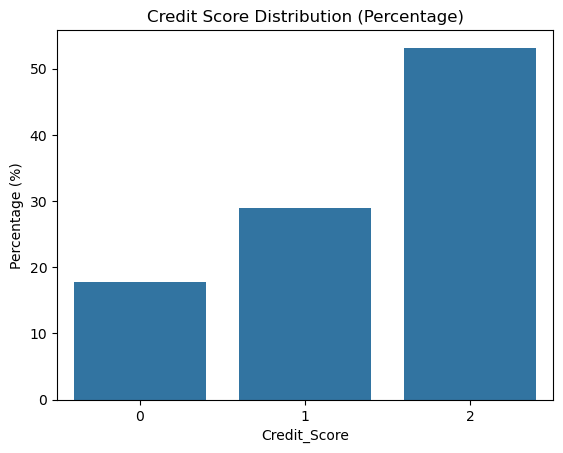

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

credit_percent = (
    train_df["Credit_Score"]
    .value_counts(normalize=True) * 100
).reset_index()

credit_percent.columns = ["Credit_Score", "Percentage"]

sns.barplot(
    x="Credit_Score",
    y="Percentage",
    data=credit_percent
)

plt.ylabel("Percentage (%)")
plt.xlabel("Credit_Score")
plt.title("Credit Score Distribution (Percentage)")
plt.show()


In [19]:
train_df["Annual_Income"].skew()

np.float64(12.51217317277124)

In [20]:
import numpy as np

train_df["Annual_Income_log"] = np.log1p(train_df["Annual_Income"])

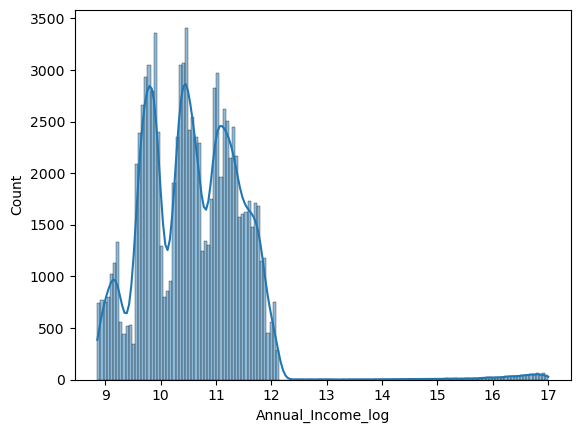

In [21]:
sns.histplot(train_df["Annual_Income_log"], kde=True)
plt.show()

In [22]:
upper_cap = train_df["Annual_Income"].quantile(0.99)
train_df["Annual_Income_capped"] = np.where(
    train_df["Annual_Income"] > upper_cap,
    upper_cap,
    train_df["Annual_Income"]
)

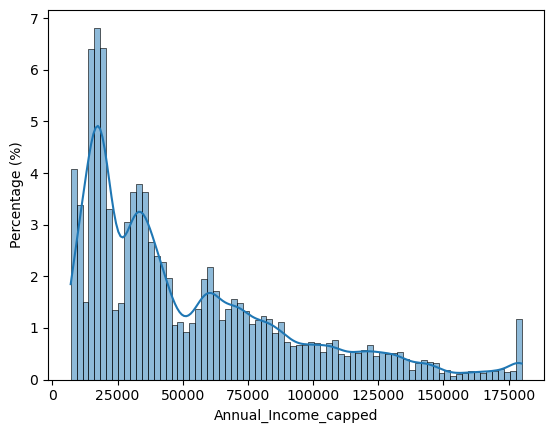

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    train_df["Annual_Income_capped"],
    kde=True,
    stat="percent"  
)

plt.ylabel("Percentage (%)")
plt.xlabel("Annual_Income_capped")
plt.show()


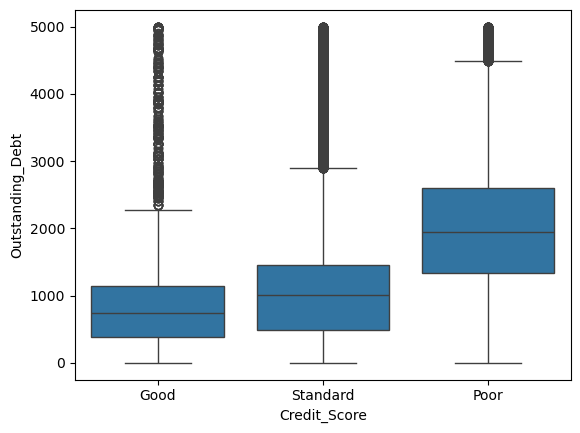

In [24]:
sns.boxplot(x="Credit_Score", y="Outstanding_Debt", data=train_df)
plt.show()

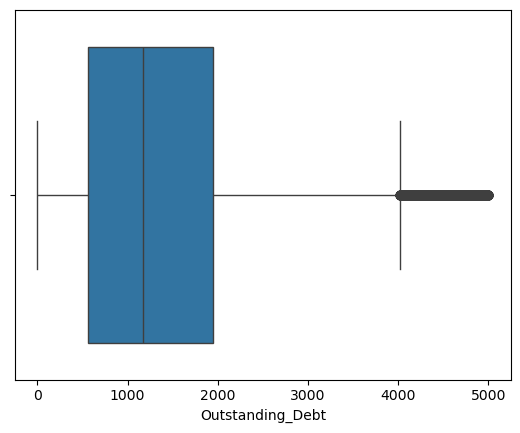

In [25]:
sns.boxplot(x=train_df["Outstanding_Debt"])
plt.show()

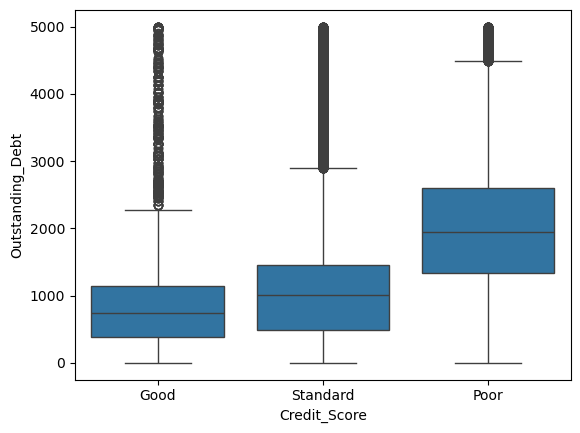

In [26]:
sns.boxplot(x="Credit_Score", y="Outstanding_Debt", data=train_df)
plt.show()

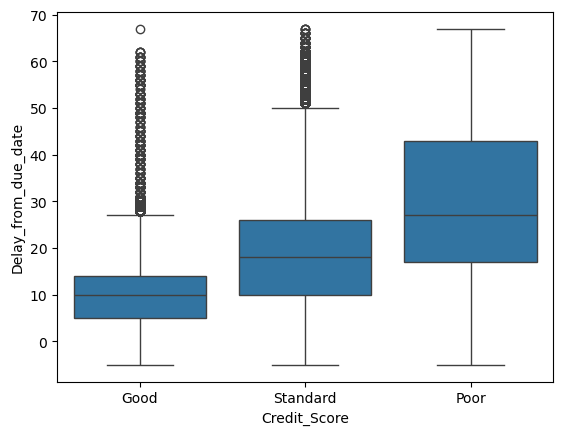

In [27]:
sns.boxplot(x="Credit_Score", y="Delay_from_due_date", data=train_df)
plt.show()

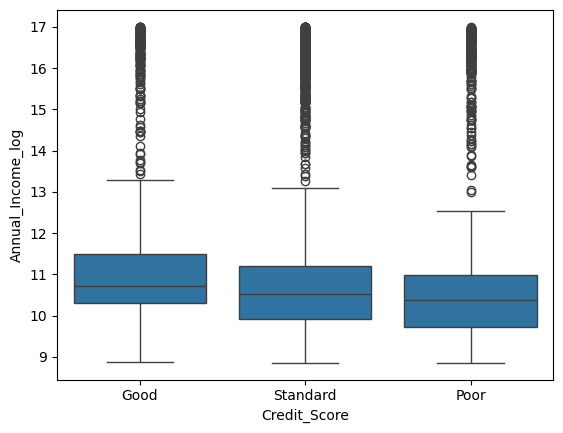

In [28]:
sns.boxplot(x="Credit_Score", y="Annual_Income_log", data=train_df)
plt.show()

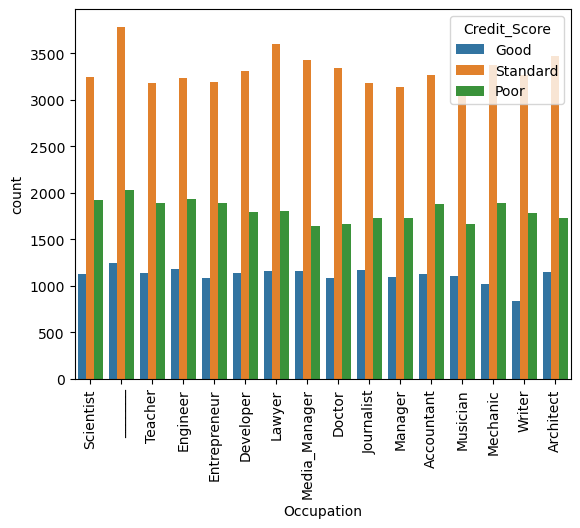

In [29]:
sns.countplot(x="Occupation", hue="Credit_Score", data=train_df)
plt.xticks(rotation=90)
plt.show()

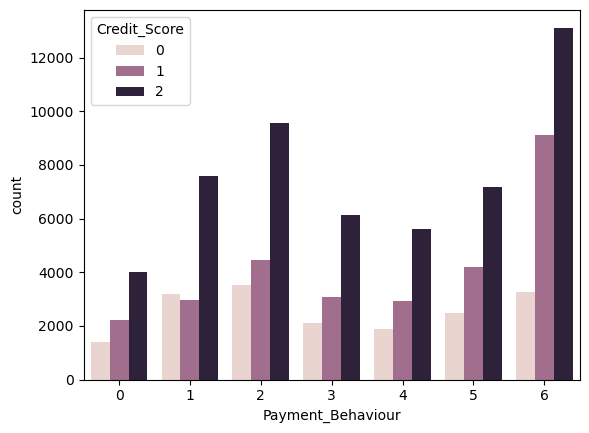

In [80]:
sns.countplot(x="Payment_Behaviour", hue="Credit_Score", data=train_df)
plt.show()

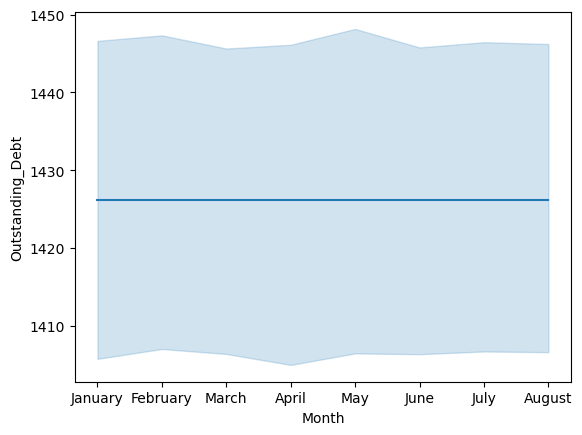

In [31]:
sns.lineplot(x="Month", y="Outstanding_Debt", data=train_df)
plt.show()

In [32]:
train_df["EMI_to_Income"] = train_df["Total_EMI_per_month"] / (train_df["Monthly_Inhand_Salary"] + 1)

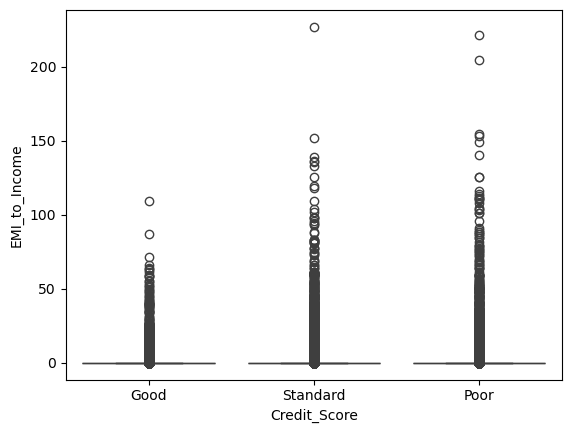

In [33]:
sns.boxplot(x="Credit_Score", y="EMI_to_Income", data=train_df)
plt.show()

In [34]:
train_df[train_df["Monthly_Inhand_Salary"] < train_df["Total_EMI_per_month"]]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Annual_Income_log,Annual_Income_capped,EMI_to_Income
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.46,3093.745000,4,...,31 Years and 3 Months,NaN,15015.0,98.674410,High_spent_Large_value_payments,740.196090,Good,11.210867,73928.46,4.851773
45,0x1643,CUS_0x95ee,June,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,...,32 Years and 3 Months,NaN,15515.0,235.790325,Low_spent_Large_value_payments,633.080175,Good,11.210867,73928.46,2.590278
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.40,10469.207759,0,...,30 Years and 10 Months,NaN,23834.0,337.434956,High_spent_Medium_value_payments,899.198772,Good,11.785350,131313.40,2.276364
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207759,0,...,30 Years and 11 Months,NaN,32662.0,263.378909,High_spent_Large_value_payments,963.254819,Good,11.785350,131313.40,3.119518
76,0x1672,CUS_0xba08,May,Jamesj,44,366-68-1681,Journalist,31370.80,2825.233333,1,...,26 Years and 9 Months,NaN,16415.0,184.700572,Low_spent_Small_value_payments,341.206633,Good,10.353665,31370.80,5.808084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99921,0x25f7b,CUS_0x2654,February,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,...,29 Years and 8 Months,NaN,20563.0,421.318866,High_spent_Medium_value_payments,582.724785,Standard,11.847009,139664.96,1.745771
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,28 Years and 1 Months,NaN,50894.0,78.514945,High_spent_Small_value_payments,493.341182,Good,10.666739,42903.79,14.669751
99970,0x25fc4,CUS_0xf16,March,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,21 Years and 3 Months,NaN,75011.0,75.504972,Low_spent_Medium_value_payments,316.184384,Good,9.722047,16680.35,49.057926
99985,0x25fdb,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,5 Years and 9 Months,NaN,12112.0,148.275233,Low_spent_Small_value_payments,273.750662,Poor,9.903682,20002.88,6.272701


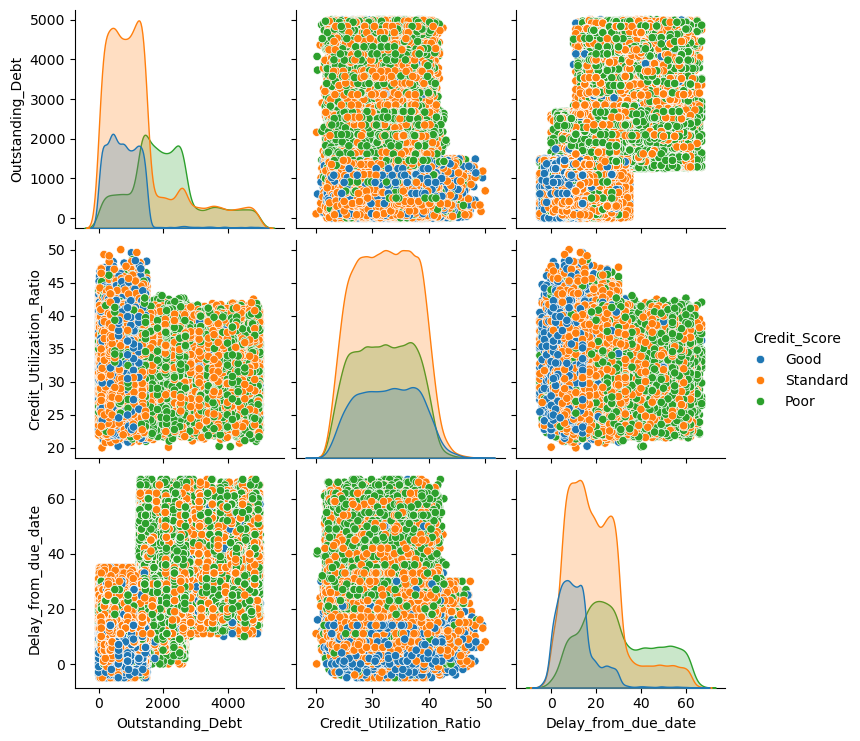

In [35]:
top_features = [
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Delay_from_due_date",
    "Credit_Score"
]

sns.pairplot(train_df[top_features], hue="Credit_Score")
plt.show()

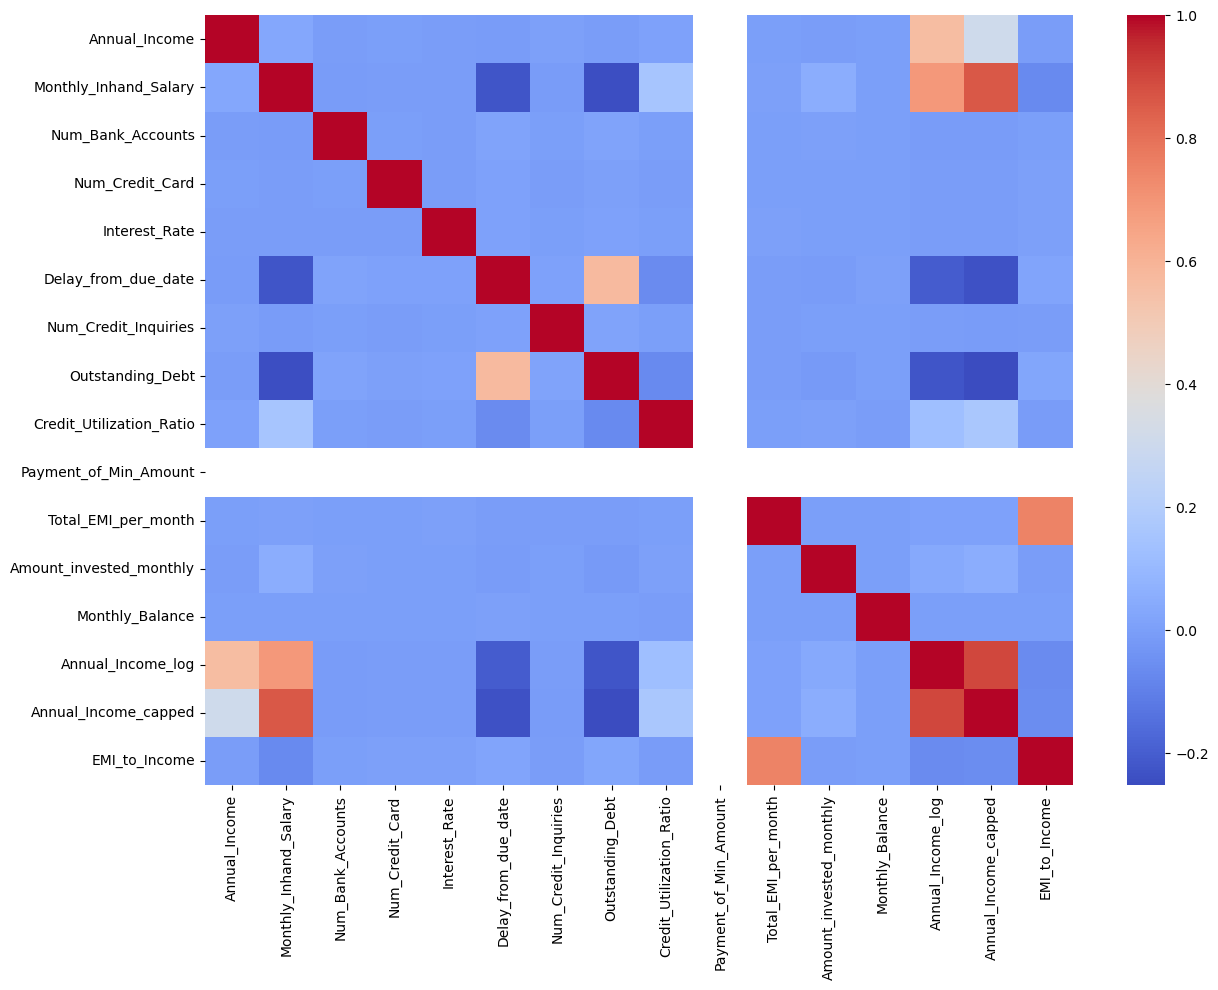

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(
    train_df.select_dtypes(include="number").corr(),
    cmap="coolwarm"
)
plt.show()

# Feature Engineering

In [37]:
train_df["Total_Credit_Exposure"] = (
    train_df["Outstanding_Debt"] + train_df["Total_EMI_per_month"]
)

In [38]:
train_df["Delay_Severity"] = (
    train_df["Delay_from_due_date"] *
    train_df["Num_of_Delayed_Payment"]
)

In [39]:
train_df["EMI_to_Income_Ratio"] = (
    train_df["Total_EMI_per_month"] / (train_df["Monthly_Inhand_Salary"] + 1)
)

In [40]:
train_df["Savings_Index"] = (
    train_df["Monthly_Balance"] - train_df["Outstanding_Debt"]
)

In [41]:
train_df["Investment_Ratio"] = (
    train_df["Amount_invested_monthly"] /
    (train_df["Monthly_Inhand_Salary"] + 1)
)

In [42]:
train_df["High_Risk_Flag"] = (
    (train_df["Delay_from_due_date"] > 30) &
    (train_df["Credit_Utilization_Ratio"] > 0.7)
).astype(int)

In [43]:
train_df["Utilization_x_Debt"] = (
    train_df["Credit_Utilization_Ratio"] *
    train_df["Outstanding_Debt"]
)

In [44]:
train_df.drop(["Name", "SSN", "ID"], axis=1, inplace=True)

In [45]:
train_df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Annual_Income_log', 'Annual_Income_capped',
       'EMI_to_Income', 'Total_Credit_Exposure', 'Delay_Severity',
       'EMI_to_Income_Ratio', 'Savings_Index', 'Investment_Ratio',
       'High_Risk_Flag', 'Utilization_x_Debt'],
      dtype='object')

In [46]:
train_df.shape

(100000, 35)

# Model Used

In [47]:
categorical_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_Behaviour',
 'Credit_Score',
 'Delay_Severity']

In [48]:
for col in categorical_cols:
    train_df[col] = train_df[col].astype(str)

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])

In [50]:
X = train_df.drop("Credit_Score", axis=1)
y = train_df["Credit_Score"]

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

C:\CHAHAT SHARMA\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Payment_of_Min_Amount']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\CHAHAT SHARMA\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Payment_of_Min_Amount']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\CHAHAT SHARMA\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\CHAHAT SHARMA\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\CHAHAT SHARMA\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, rf_pred)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      3527
           1       0.79      0.81      0.80      5874
           2       0.81      0.81      0.81     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [63]:
accuracy_score(y_test, xgb_pred)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      3527
           1       0.77      0.74      0.75      5874
           2       0.79      0.79      0.79     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.77      0.76      0.76     20000



In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

C:\CHAHAT SHARMA\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [19]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\CHAHAT SHARMA\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [19]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.70385
              precision    recall  f1-score   support

           0       0.57      0.70      0.63      3527
           1       0.73      0.64      0.68      5874
           2       0.75      0.74      0.74     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.69      0.68     20000
weighted avg       0.71      0.70      0.71     20000



In [65]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))

C:\CHAHAT SHARMA\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\CHAHAT SHARMA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\CHAHAT SHARMA\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\CHAHAT SHARMA\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6333
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 31
[LightGBM] [Info] Start training from score -1.721697
[LightGBM] [Info] Start training from score -1.241156
[LightGBM] [Info] Start training from score -0.630759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

C:\CHAHAT SHARMA\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy: 0.763
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      3527
           1       0.76      0.74      0.75      5874
           2       0.79      0.79      0.79     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



In [67]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 3.7/102.4 MB 22.0 MB/s eta 0:00:05
   - -------------------------------------- 3.7/102.4 MB 22.0 MB/s eta 0:00:05
   -- ------------------------------------- 5.8/102.4 MB 9.7 MB/s eta 0:00:11
   -- ------------------------------------- 6.3/102.4 MB 8.2 MB/s eta 0:00:12
   -- ------------------------------------- 6.6/102.4 MB 7.3 MB/s eta 0:00:14
   -- ------------------------------------- 6.8/102.4 MB 5.8 MB/s eta 0:00:17
   -- ------------------------------------- 7.3/102.4 MB 5.1 MB/s eta 0:00:19
   --- ------------------------------------ 8.1/102.4 MB 4.9 MB/s eta 0:00:20
   --- ------------------------------------ 8.9/102.4 MB 4.8 MB/s eta 0:00:20
   --- ------------------------------------ 10.2/102.4 MB 4.8 MB/s eta 0:00:20
   ---- ----------------------------------- 11.3/102.4 MB 4.9 MB/s eta 0:00:19
   ---- ----------------------------------- 11.8/102.4 MB 4.7 MB/s 

In [68]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function="MultiClass",
    verbose=0
)

cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, cat_pred))
print(classification_report(y_test, cat_pred))

CatBoost Accuracy: 0.7248
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      3527
           1       0.74      0.69      0.71      5874
           2       0.76      0.76      0.76     10599

    accuracy                           0.72     20000
   macro avg       0.70      0.71      0.71     20000
weighted avg       0.73      0.72      0.73     20000



In [69]:
# Model Compare
results = {
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "XGBoost": accuracy_score(y_test, xgb_pred),
    "LightGBM": accuracy_score(y_test, lgb_pred),
    "CatBoost": accuracy_score(y_test, cat_pred)
}

pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])

,Accuracy
Decision Tree,0.70385
Random Forest,0.79745
XGBoost,0.76455
LightGBM,0.76300
CatBoost,0.72480


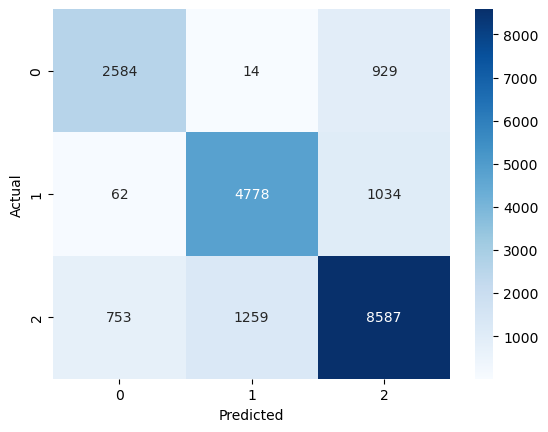

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      3527
           1       0.79      0.81      0.80      5874
           2       0.81      0.81      0.81     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, rf_pred))

# Feature Importance 

In [71]:
best_model = rf   
feature_names = X.columns
import pandas as pd

rf_importance = pd.Series(
    best_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

rf_importance.head(10)

Outstanding_Debt         0.070799
Credit_Mix               0.068806
Interest_Rate            0.061396
Total_Credit_Exposure    0.052766
Utilization_x_Debt       0.051780
Delay_from_due_date      0.047049
Credit_History_Age       0.036850
Changed_Credit_Limit     0.036317
Num_Credit_Inquiries     0.034319
Num_Credit_Card          0.033892
dtype: float64

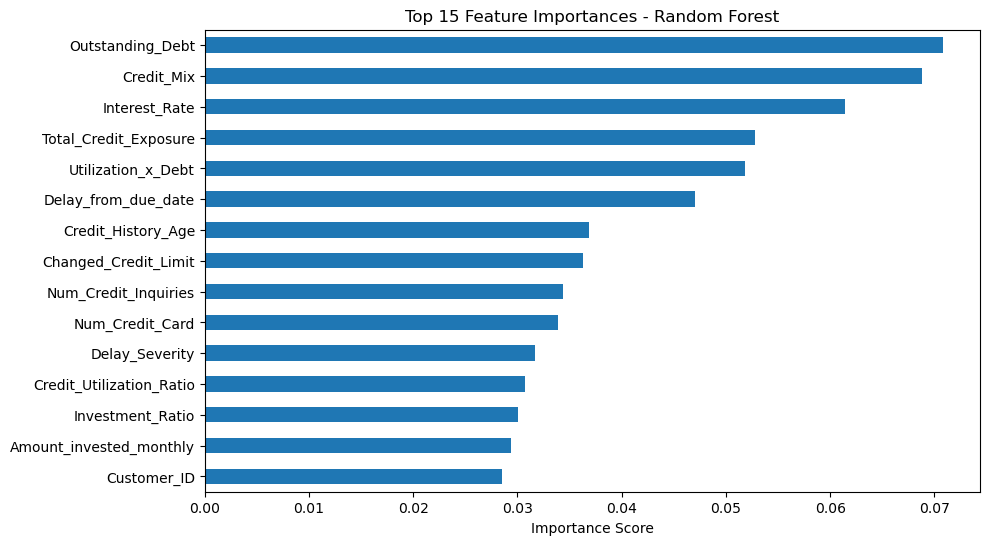

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
rf_importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()

# Hyperparameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [4,6,8],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [200, 300]
}

grid = GridSearchCV(
    XGBClassifier(
        objective="multi:softmax",
        num_class=3,
        eval_metric="mlogloss"
    ),
    param_grid,
    cv=3,
    scoring="accuracy"
)

grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}

In [74]:
final_model = grid.best_estimator_

final_pred = final_model.predict(X_test)

print(accuracy_score(y_test, final_pred))
print(classification_report(y_test, final_pred))

0.79185
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3527
           1       0.79      0.79      0.79      5874
           2       0.81      0.81      0.81     10599

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000

